In [2]:
#importing all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
#reading the csv file
df_day=pd.read_csv('../day.csv')

In [4]:
#checking the data 
df_day.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1-Jan-18,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2-Jan-18,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3-Jan-18,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4-Jan-18,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5-Jan-18,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,6-Jan-18,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,7-Jan-18,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,8-Jan-18,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,9-Jan-18,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-Jan-18,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
#checking the info of data for null values and their data type
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking the value ranges and if their is anything unusual
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#convertinge date column into date format
df_day['dteday']=pd.to_datetime(df_day['dteday'])

In [8]:
#cheing the date column again after converting it into the format
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [9]:
#creating minimum date to check for how many days company has startet gining cycle service 
min_day=dt.date(2017,12,31)
df_day['no_of_day']=df_day['dteday']- pd.to_datetime(min_day)

In [10]:
#checking the columns of no_of_days
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,no_of_day
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1 days
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2 days
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3 days
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4 days
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5 days


In [11]:
# removing 'days' keyword from no.of days column  and converting it to int
df_day['no_of_day']=df_day['no_of_day'].map(lambda x : str(x).split(" ")[0])

df_day['no_of_day']=df_day['no_of_day'].astype('int')

In [12]:
#removing columns instant from the data as it is sr. no nothing more than that
df_day.drop(columns=['instant'],axis=1,inplace=True)

<AxesSubplot:>

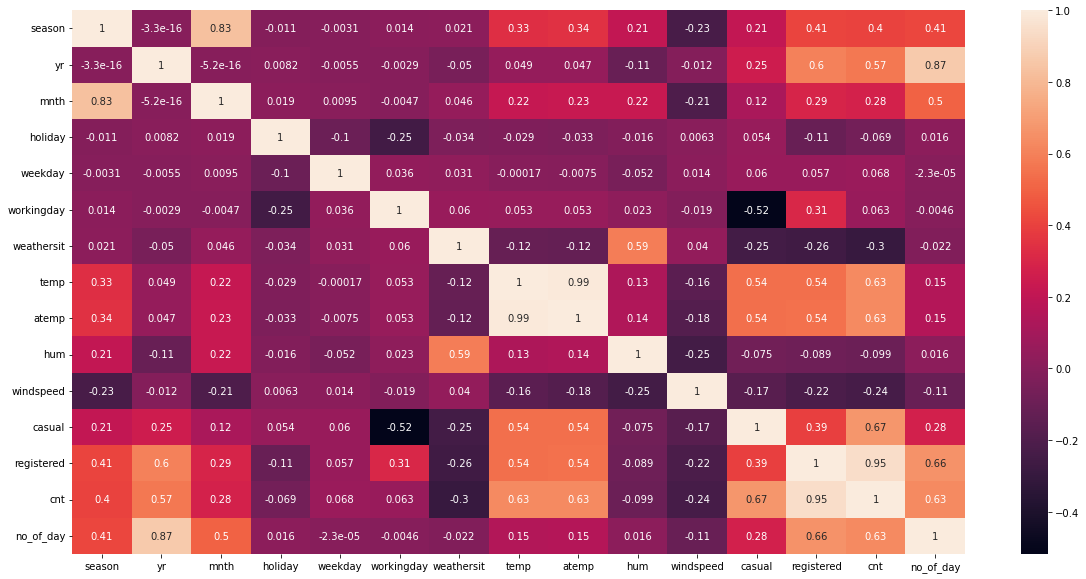

In [13]:
#plotting correlation matrix to check correlation amongst variable
pyplot.figure(figsize=(20,10))
sns.heatmap(df_day.corr(),annot=True)

<AxesSubplot:xlabel='yr', ylabel='cnt'>

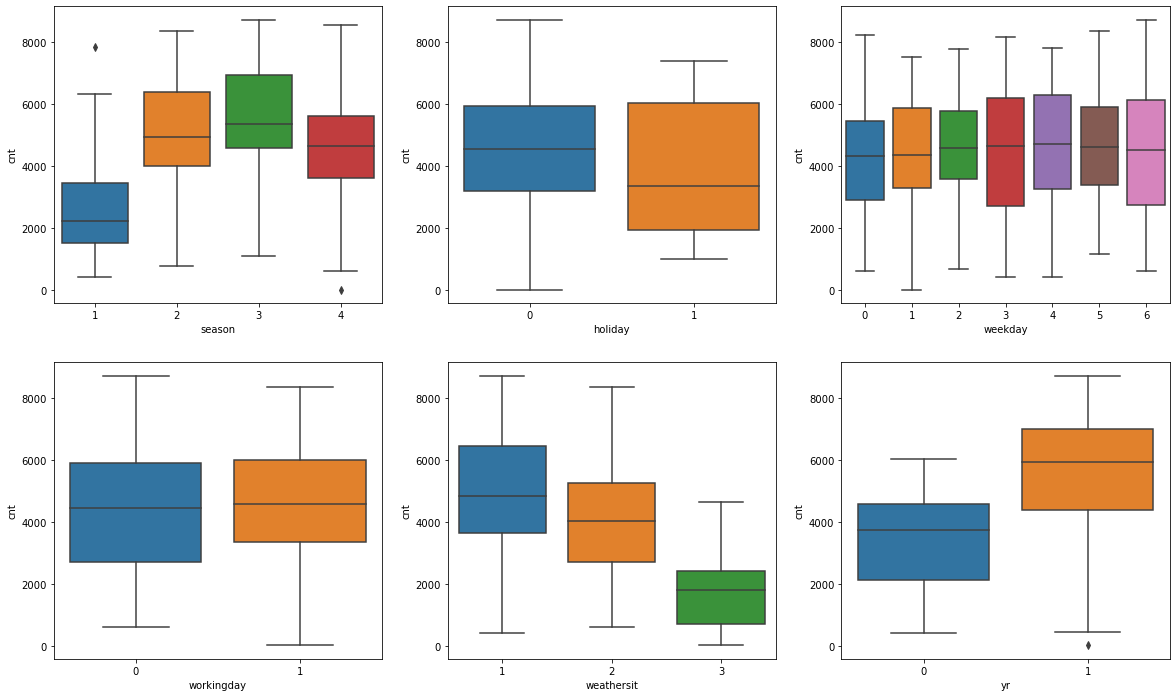

In [14]:
# checking the variance of cnt variable amongst categorical variables 
pyplot.figure(figsize=(20,12))
pyplot.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df_day)
pyplot.subplot(2,3,2)
sns.boxplot(x='holiday',y='cnt',data=df_day)
pyplot.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt',data=df_day)
pyplot.subplot(2,3,4)
sns.boxplot(x='workingday',y='cnt',data=df_day)
pyplot.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt',data=df_day)
pyplot.subplot(2,3,6)
sns.boxplot(x='yr',y='cnt',data=df_day)


<AxesSubplot:xlabel='yr', ylabel='count'>

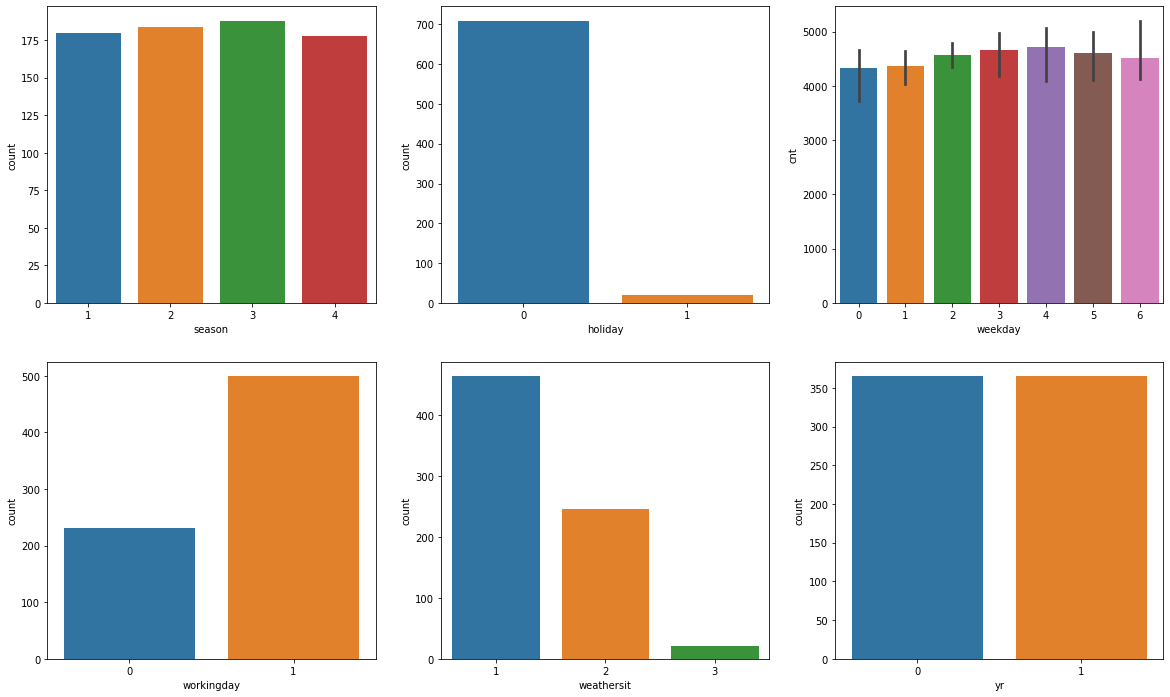

In [15]:
# checking the count of each categorical variable  
pyplot.figure(figsize=(20,12))
pyplot.subplot(2,3,1)
sns.countplot(x='season',data=df_day)
pyplot.subplot(2,3,2)
sns.countplot(x='holiday',data=df_day)
pyplot.subplot(2,3,3)
sns.barplot(x='weekday',y='cnt',data=df_day,estimator=np.median)
pyplot.subplot(2,3,4)
sns.countplot(x='workingday',data=df_day)
pyplot.subplot(2,3,5)
sns.countplot(x='weathersit',data=df_day)
pyplot.subplot(2,3,6)
sns.countplot(x='yr',data=df_day)

<AxesSubplot:xlabel='cnt', ylabel='Count'>

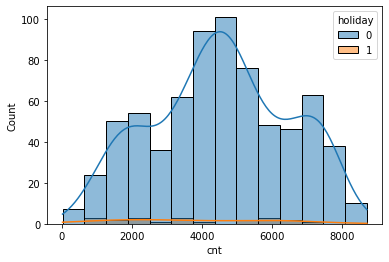

In [16]:
sns.histplot(data=df_day,x='cnt',kde=True,hue='holiday')

<AxesSubplot:xlabel='holiday', ylabel='count'>

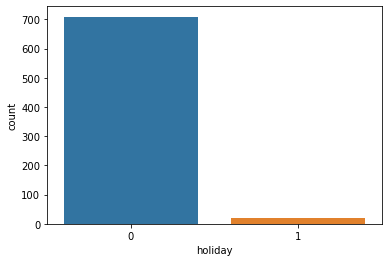

In [17]:
sns.countplot(data=df_day,x='holiday',)

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

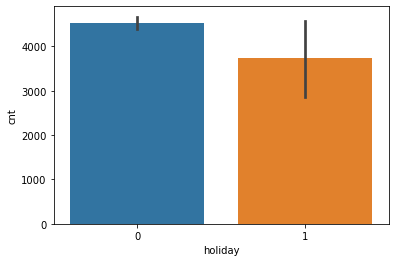

In [18]:
sns.barplot(data=df_day,x='holiday',y='cnt')

<AxesSubplot:xlabel='cnt', ylabel='Density'>

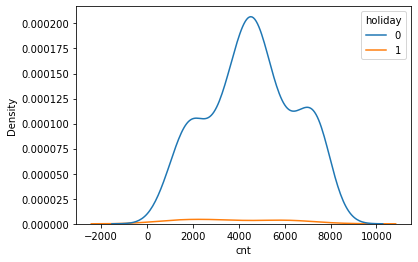

In [19]:
sns.kdeplot(x='cnt',data=df_day,hue='holiday')

In [ ]:
# scater plot for all the variables
pyplot.figure(figsize=(25,10))
sns.pairplot(df_day)

In [ ]:
#checking distrbution of target variable
sns.histplot(df_day['cnt'],kde=True)


In [ ]:
#making dummy variables for some of the categorical variable
variable=['season','mnth','weekday','weathersit']
dd=pd.get_dummies(data=df_day,columns=variable,prefix_sep='_',drop_first=True)


In [ ]:
#checking the variable after converting them in dummy variables
dd

In [ ]:
# creating some of the variable as VIF of these variable was more than 6 
dd['hum_per_temp']=dd['hum']/dd['temp']
dd['hum_per_ws']=dd['hum']/dd['windspeed']

In [ ]:
#cheing variable if after transaforming it has null value
dd.info()

In [ ]:
# created some fucntion to fit the model for vif and seeing the summary of model , so that we can use them for multiple iteration 
def residual_analysis(x,y,ypred):
    fig = pyplot.figure()
    res=y-ypred
    pyplot.figure(figsize=(20,12))
    pyplot.subplot(2,3,1)
    sns.histplot(res,kde=True)
    fig.suptitle('Residual Distribution', fontsize = 20) 
    pyplot.subplot(2,3,2)
    sns.scatterplot(x=ypred,y=res)
    fig.suptitle('Homoscedasticity', fontsize = 20) 
   
    

def vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

def sm1(X_train,y_train):
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()
#     print(lr_1.params)
    print(lr_1.summary())

In [ ]:
# created some fucntion to fit the model so that we can use them for multiple iteration 
lr = LinearRegression()
def linear_reg(x,y):
    lr.fit(x,y)
    y_pred=lr.predict(x)
    print('R2 of the model you just ran {0}%'.format(r2_score(y,y_pred)*100))
    residual_analysis(x,y,y_pred)
    vif(x)
    sm1(x,y)

def linear_reg_test(x,y):
    y_pred=lr.predict(x)
    print('R2 of the model you just ran {0}%'.format(r2_score(y,y_pred)*100))
    print("\n \n ###### For linear resg ression TEST DATA- Residual ################ \n")
    residual_analysis(x,y,y_pred)



In [ ]:
# dropping the variables one by one so that we can check the model accuracy , i have created the above fuction so that i can run it 
# manully and check the result

var_drop=['dteday','temp','no_of_day','casual','registered','weekday_2','mnth_12','mnth_11','workingday',\
          'mnth_7','weekday_4','weekday_3','weekday_5','weekday_6','weekday_1','mnth_2',\
         'mnth_3','mnth_4','mnth_5','mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','atemp','hum','windspeed']
dd1=dd.drop(columns=var_drop,axis=1)

# divinding the data into train test 
df_train,df_test=train_test_split(dd1,train_size=.70,random_state=10)

# using min max scaler to scaled the variable between 0 to 1
mmscalar=MinMaxScaler()
scaled_dd=mmscalar.fit_transform(df_train)
scaled_dd1=pd.DataFrame(data=scaled_dd,columns=df_train.columns)

# creating  X and Y variable to run linear regression 

y=scaled_dd1.pop('cnt')
x=scaled_dd1

# doing all the manipulation on test data so that we can have all the same variables which we have in test 

scaled_test=mmscalar.fit_transform(df_test)
scaled_test1=pd.DataFrame(data=scaled_test,columns=df_test.columns)
y_test=scaled_test1.pop('cnt')
x_test=scaled_test1

In [ ]:
# Calling below functions to run the multiple iteration of  MLR algorithm
print("For linear regression TRAIN DATA \n")
linear_reg(x,y)

In [ ]:
print("\n For linear resg ression TEST DATA \n")
linear_reg_test(x_test,y_test)